In [ ]:
import keras
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.applications.vgg19 import VGG19

#USES GPU?
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# DATA EXTRACTION -----------------------------------------------------------------------------------------
batch_size = 30
epochs = 100
num_classes = 3

train_data_dir = './Dataset/training'
validation_data_dir = './Dataset/validation'
test_data_dir = './Dataset/test'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1
)

validation_datagen = ImageDataGenerator(
        rescale=1./255
)

test_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        batch_size=batch_size,
        target_size=(128, 128),
        class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        batch_size=batch_size,
        target_size=(128, 128),
        class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(128, 128),
        class_mode='categorical'
)


Found 7200 images belonging to 3 classes.
Found 1332 images belonging to 3 classes.
Found 448 images belonging to 3 classes.


In [ ]:
# MODEL ---------------------------------------------------------------------------------------------------
model = Sequential()

vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model.add(vgg19)
model.add(Flatten())
model.add(Dense(3,activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

80150528/80134624 [==============================] - 34s 0us/step


In [ ]:
# TRAINING ------------------------------------------------------------------------------------------------

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

history = model.fit(train_generator,
          epochs=epochs,
          verbose=1,
          validation_data = validation_generator,
          callbacks = [es])

Epoch 1/100
240/240 [==============================] - 30s 115ms/step - loss: 1.3986 - accuracy: 0.3217 - val_loss: 1.2744 - val_accuracy: 0.3378
Epoch 2/100
240/240 [==============================] - 26s 110ms/step - loss: 1.2317 - accuracy: 0.3603 - val_loss: 1.1566 - val_accuracy: 0.3791
Epoch 3/100
240/240 [==============================] - 26s 110ms/step - loss: 1.1249 - accuracy: 0.4039 - val_loss: 1.0814 - val_accuracy: 0.4227
Epoch 4/100
240/240 [==============================] - 26s 110ms/step - loss: 1.0472 - accuracy: 0.4566 - val_loss: 1.0260 - val_accuracy: 0.4655
Epoch 5/100
240/240 [==============================] - 27s 111ms/step - loss: 1.0037 - accuracy: 0.5034 - val_loss: 0.9816 - val_accuracy: 0.5135
Epoch 6/100
240/240 [==============================] - 26s 109ms/step - loss: 0.9590 - accuracy: 0.5443 - val_loss: 0.9429 - val_accuracy: 0.5383
Epoch 7/100
240/240 [==============================] - 27s 110ms/step - loss: 0.9182 - accuracy: 0.5709 - val_loss: 0.9084 -

Epoch 57/100
240/240 [==============================] - 26s 108ms/step - loss: 0.4377 - accuracy: 0.8519 - val_loss: 0.4419 - val_accuracy: 0.8461
Epoch 58/100
240/240 [==============================] - 26s 109ms/step - loss: 0.4170 - accuracy: 0.8634 - val_loss: 0.4388 - val_accuracy: 0.8476
Epoch 59/100
240/240 [==============================] - 26s 108ms/step - loss: 0.4258 - accuracy: 0.8568 - val_loss: 0.4358 - val_accuracy: 0.8491
Epoch 60/100
240/240 [==============================] - 26s 108ms/step - loss: 0.4238 - accuracy: 0.8599 - val_loss: 0.4330 - val_accuracy: 0.8506
Epoch 61/100
240/240 [==============================] - 27s 114ms/step - loss: 0.4110 - accuracy: 0.8607 - val_loss: 0.4301 - val_accuracy: 0.8514
Epoch 62/100
240/240 [==============================] - 27s 113ms/step - loss: 0.4114 - accuracy: 0.8683 - val_loss: 0.4274 - val_accuracy: 0.8514
Epoch 63/100
240/240 [==============================] - 27s 114ms/step - loss: 0.4151 - accuracy: 0.8652 - val_loss: 0

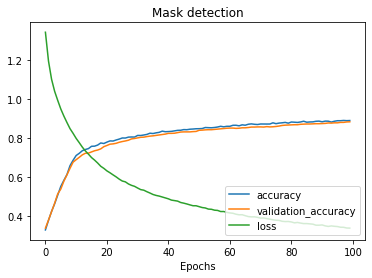

In [ ]:
# PROGRESS VISUALIZATION ----------------------------------------------------------------------------------
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="validation_accuracy")
plt.plot(history.history['loss'], label="loss")

plt.title("Mask detection")
plt.xlabel("Epochs")
plt.legend(loc="lower right")

plt.show()



In [ ]:
# SAVE ----------------------------------------------------------------------------------------------------
model.save("modelo4.h5")

In [ ]:
# PRODUCTION ----------------------------------------------------------------------------------------------
from PIL import Image

def classToText(prediction):
    array = prediction[0]
    if array[0] == 1:
        print("Mascarilla puesta incorrectamente")
    elif array[1] == 1:
        print("Con mascarilla")
    else:
        print("Sin mascarilla")

model = keras.models.load_model("modelo2.h5")
score = model.evaluate_generator(test_generator, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


c:\users\ale-k\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


14/14 [==============================] - 5s 32ms/step - loss: 0.1020 - accuracy: 0.9821
Test loss: 0.10196999460458755
Test accuracy: 0.9821428656578064


c:\users\ale-k\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


14/14 [==============================] - 5s 32ms/step
Confusion Matrix


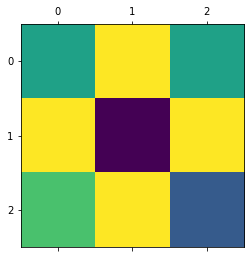

              precision    recall  f1-score   support

 Mask not OK       0.32      0.33      0.33       150
     Mask OK       0.30      0.30      0.30       149
  Mask wrong       0.32      0.32      0.32       149

    accuracy                           0.31       448
   macro avg       0.31      0.31      0.31       448
weighted avg       0.31      0.31      0.31       448



In [ ]:
#Confusion matrix and general report
predict = model.predict_generator(test_generator, verbose=1)
predict = np.argmax(predict, axis=1)
matrix = confusion_matrix(test_generator.classes, predict)
print('Confusion Matrix')
plt.matshow(matrix)
#plt.colorbar()
plt.show()
target_names = {'Mask wrong', 'Mask OK', 'Mask not OK'}
print(classification_report(test_generator.classes, predict, target_names=target_names))

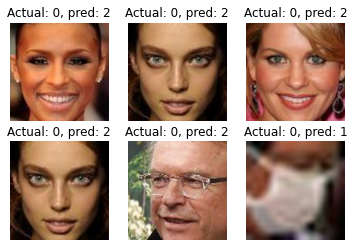

In [ ]:
######### pruebas directas #######################
x = test_generator.next()
for i in range(6):
    random_val = np.random.randint(low=0, high=len(test_generator))
    img = x[0][random_val]
    actual_label = np.argmax(test_generator.classes[random_val])
    prediction = np.argmax(model.predict(np.expand_dims(img, axis=0)))
    plt.subplot(2, 3, (i+1))
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Actual: {actual_label}, pred: {prediction}")
plt.show()